In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bc= pd.read_csv('BankCreditCard.csv')

In [3]:
bc.head()

Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0            1        20000.0       2                       2        1   
1            2       220000.0       2                       2        2   
2            3        90000.0       2                       2        2   
3            4        50000.0       2                       2        1   
4            5        50000.0       1                       2        1   

   Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0         24                     2                     2   
1         26                     0                     2   
2         34                     0                     0   
3         37                     0                     0   
4         57                     0                     0   

   Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                       0                       0  ...                0.0   
1                       0                       0  ...             3272.0   
2                       0                       0  ...            24332.0   
3                       0                       0  ...            29324.0   
4                       0                       0  ...            20940.0   

   May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0              0.0               0.0                   0.0   
1           3455.0            3261.0                   0.0   
2          14848.0           15548.0                1619.0   
3          28858.0           28547.0                3000.0   
4          18146.0           18131.0                3000.0   

   Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                 679.0                     0.0                     0.0   
1                2000.0                  1000.0                  1000.0   
2                2500.0                  1000.0                  1000.0   
3                2029.0                  1200.0                  1100.0   
4               36672.0                 10000.0                  9000.0   

   Previous_Payment_May  Previous_Payment_June  Default_Payment  
0                   0.0                    0.0                1  
1                   0.0                 2000.0                1  
2                1000.0                 5000.0                0  
3                1069.0                 1000.0                0  
4                 689.0                  679.0                0  

[5 rows x 25 columns]

### Data Description 
•Customer ID: Unique identification of each customer 
•Credit_Amount: Credit amount in dollars 
•Gender: 1=Male, 2=Female 
•Academic_Qualification: 1=Undergraduate, 2=Graduate, 3=Postgraduate, 4=Professional, 5=Others, 6=Unknown 
•Marital:1=Married, 2=Single, 3=Do not prefer to say 
•Age_Years: Age in years
•Repayment_Status_Jan: Repayment status in Jan (0=Paid on time, 1=Payment delay for one month, 2=Payment delay for two months, ... 6=Payment delay for six months) 
•Repayment_Status_Feb: Repayment status in Feb (Scale same as above) 
•Repayment_Status_March: Repayment status in March (Scale same as above) 
•Repayment_Status_April: Repayment status in April (Scale same as above) 
•Repayment_Status_May: Repayment status in May (Scale same as above) 
•Repayment_Status_June: Repayment status in June (Scale same as above) 
•Jan_Bill_Amount: Amount of bill statement in Jan (In dollars) 
•Feb_Bill_Amount: Amount of bill statement in Feb (In dollar) 
•March_Bill_Amount: Amount of bill statement in March (In dollar) 
•April_Bill_Amount: Amount of bill statement in April (In dollar) 
•May_Bill_Amount: Amount of bill statement in May (In dollar) 
•June_Bill_Amount : Amount of bill statement in June (In dollar) 
•Previous_Payment_Jan: Amount of previous payment in Jan (In dollar) 
•Previous_Payment_Feb: Amount of previous payment in Feb (In dollar) 
•Previous_Payment_March: Amount of previous payment in March (In dollar) 
•Previous_Payment_April: Amount of previous payment in April (In dollar)
•Previous_Payment_May: Amount of previous payment in May (In dollar) 
•Previous_Payment_June: Amount of previous payment in June (In dollar) 
•Default_Payment: Default payment of next month (1=yes, 0=no) 


Objective-Build a classification model using support vector classifier to predict the credibility of the customer, in order to minimize the risk and maximize the profit of a bank.

## Exploratory Data Analysis

In [4]:
bc.isnull().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [5]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [6]:
bc.describe()

Customer ID  Credit_Amount        Gender  Academic_Qualification  \
count  30000.000000   3.000000e+04  30000.000000            30000.000000   
mean   15000.500000   1.929173e+05      1.603733                1.855933   
std     8660.398374   1.322888e+05      0.489129                0.794397   
min        1.000000   2.000000e+04      1.000000                1.000000   
25%     7500.750000   5.000000e+04      1.000000                1.000000   
50%    15000.500000   2.200000e+05      2.000000                2.000000   
75%    22500.250000   2.700000e+05      2.000000                2.000000   
max    30000.000000   2.000000e+06      2.000000                6.000000   

            Marital     Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
count  30000.000000  30000.000000          30000.000000          30000.000000   
mean       1.551867     35.485500              0.355200              0.319300   
std        0.521970      9.217904              0.746984              0.796012   
min        0.000000     21.000000              0.000000              0.000000   
25%        1.000000     28.000000              0.000000              0.000000   
50%        2.000000     34.000000              0.000000              0.000000   
75%        2.000000     41.000000              0.000000              0.000000   
max        3.000000     79.000000              6.000000              6.000000   

       Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
count            30000.000000             30000.00000  ...       30000.000000   
mean                 0.302967                 0.25670  ...       55122.263933   
std                  0.781792                 0.74388  ...       83577.329356   
min                  0.000000                 0.00000  ...     -270000.000000   
25%                  0.000000                 0.00000  ...        2671.500000   
50%                  0.000000                 0.00000  ...       25629.000000   
75%                  0.000000                 0.00000  ...       54508.500000   
max                  6.000000                 6.00000  ...      992596.000000   

       May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
count     30000.000000      30000.000000          30000.000000   
mean      39939.618800      38506.051533           6285.653867   
std       60373.934792      59104.280171          18944.920299   
min      -81334.000000    -338603.000000              0.000000   
25%        1763.000000       1256.000000           1000.000000   
50%       18043.000000      17071.000000           3000.000000   
75%       50190.500000      48655.250000           6000.000000   
max      827171.000000     861664.000000         973663.000000   

       Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
count          3.000000e+04            30000.000000            30000.000000   
mean           7.466544e+03             5836.140567             5127.687433   
std            3.467950e+04            20696.306703            17103.762740   
min            0.000000e+00                0.000000                0.000000   
25%            7.700000e+02              550.000000              333.000000   
50%            2.542000e+03             1900.000000             1500.000000   
75%            5.000000e+03             5500.000000             4013.250000   
max            2.674259e+06           999055.000000           538897.000000   

       Previous_Payment_May  Previous_Payment_June  Default_Payment  
count           30000.00000           30000.000000     30000.000000  
mean             5261.19120            5215.502567         0.221200  
std             16989.50685           17777.465775         0.415062  
min                 0.00000               0.000000         0.000000  
25%               310.00000             117.750000         0.000000  
50%              1539.00000            1500.000000         0.000000  
75%              5000.00000            4000.000000         0.00000

As we can see under Marital there is  a category 0 which is not mentioned in the data desciption and that has to be removed.

## Data Visualization

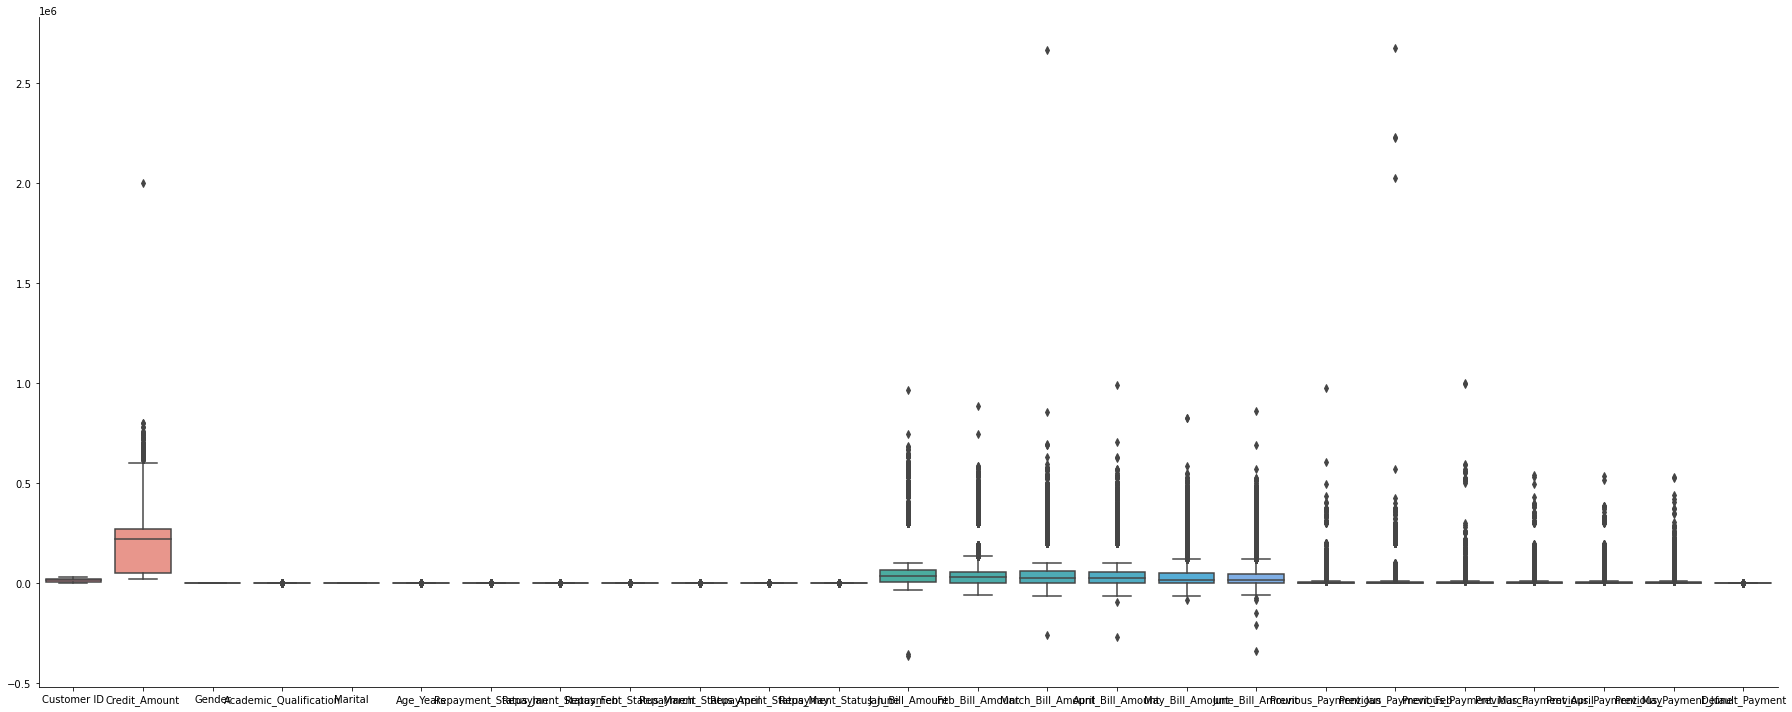

In [7]:
sns.catplot(data=bc, kind='box',height=10,aspect=2.5)

We need to outliers as we can we see there is a outlier in Credit Amount and Monthly Bill Amount.

In [8]:
Q1 = bc.Credit_Amount.quantile(0.25)
Q3 = bc.Credit_Amount.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

220000.0


In [9]:
bc=bc[ (bc.Credit_Amount> (Q1-1.5*IQR) ) & (bc.Credit_Amount<(Q3 +1.5*IQR) ) ]

In [10]:
Q17 = bc.Age_Years.quantile(0.25)
Q37 = bc.Age_Years.quantile(0.75)
IQR1 = Q37 - Q17
print(IQR1)

13.0


In [11]:
bc=bc[ (bc.Age_Years> (Q17-1.5*IQR1) ) & (bc.Age_Years<(Q37 +1.5*IQR1) ) ]

In [12]:
Q11 = bc.Jan_Bill_Amount.quantile(0.25)
Q31 = bc.Jan_Bill_Amount.quantile(0.75)
IQR2 = Q31 - Q11
print(IQR2)

62755.25


In [13]:
bc=bc[ (bc.Jan_Bill_Amount> (Q11-1.5*IQR2) ) & (bc.Jan_Bill_Amount<(Q31 +1.5*IQR2) ) ]

In [14]:
Q12 = bc.Feb_Bill_Amount.quantile(0.25)
Q32 = bc.Feb_Bill_Amount.quantile(0.75)
IQR3 = Q32 - Q12
print(IQR3)

39362.75


In [15]:
bc=bc[ (bc.Feb_Bill_Amount> (Q12-1.5*IQR3) ) & (bc.Feb_Bill_Amount<(Q32 +1.5*IQR3) ) ]

In [16]:
Q13 = bc.March_Bill_Amount.quantile(0.25)
Q33= bc.March_Bill_Amount.quantile(0.75)
IQR4 = Q33 - Q13
print(IQR4)

34982.0


In [17]:
bc=bc[ (bc.March_Bill_Amount> (Q13-1.5*IQR4) ) & (bc.March_Bill_Amount<(Q33 +1.5*IQR4) ) ]

In [18]:
Q14 = bc.April_Bill_Amount.quantile(0.25)
Q34 = bc.April_Bill_Amount.quantile(0.75)
IQR5 = Q34 - Q14
print(IQR5)

27948.25


In [19]:
bc=bc[ (bc.April_Bill_Amount> (Q14-1.5*IQR5) ) & (bc.April_Bill_Amount<(Q34 +1.5*IQR5) ) ]

In [20]:
Q15 = bc.May_Bill_Amount.quantile(0.25)
Q35 = bc.May_Bill_Amount.quantile(0.75)
IQR6 = Q35 - Q15
print(IQR6)

25669.5


In [21]:
bc=bc[ (bc.May_Bill_Amount> (Q15-1.5*IQR6) ) & (bc.May_Bill_Amount<(Q35 +1.5*IQR6) ) ]

In [22]:
Q16 = bc.June_Bill_Amount.quantile(0.25)
Q36 = bc.June_Bill_Amount.quantile(0.75)
IQR7 = Q36 - Q16
print(IQR7)

23809.0


In [23]:
bc=bc[ (bc.June_Bill_Amount> (Q16-1.5*IQR7) ) & (bc.June_Bill_Amount<(Q36 +1.5*IQR7) ) ]

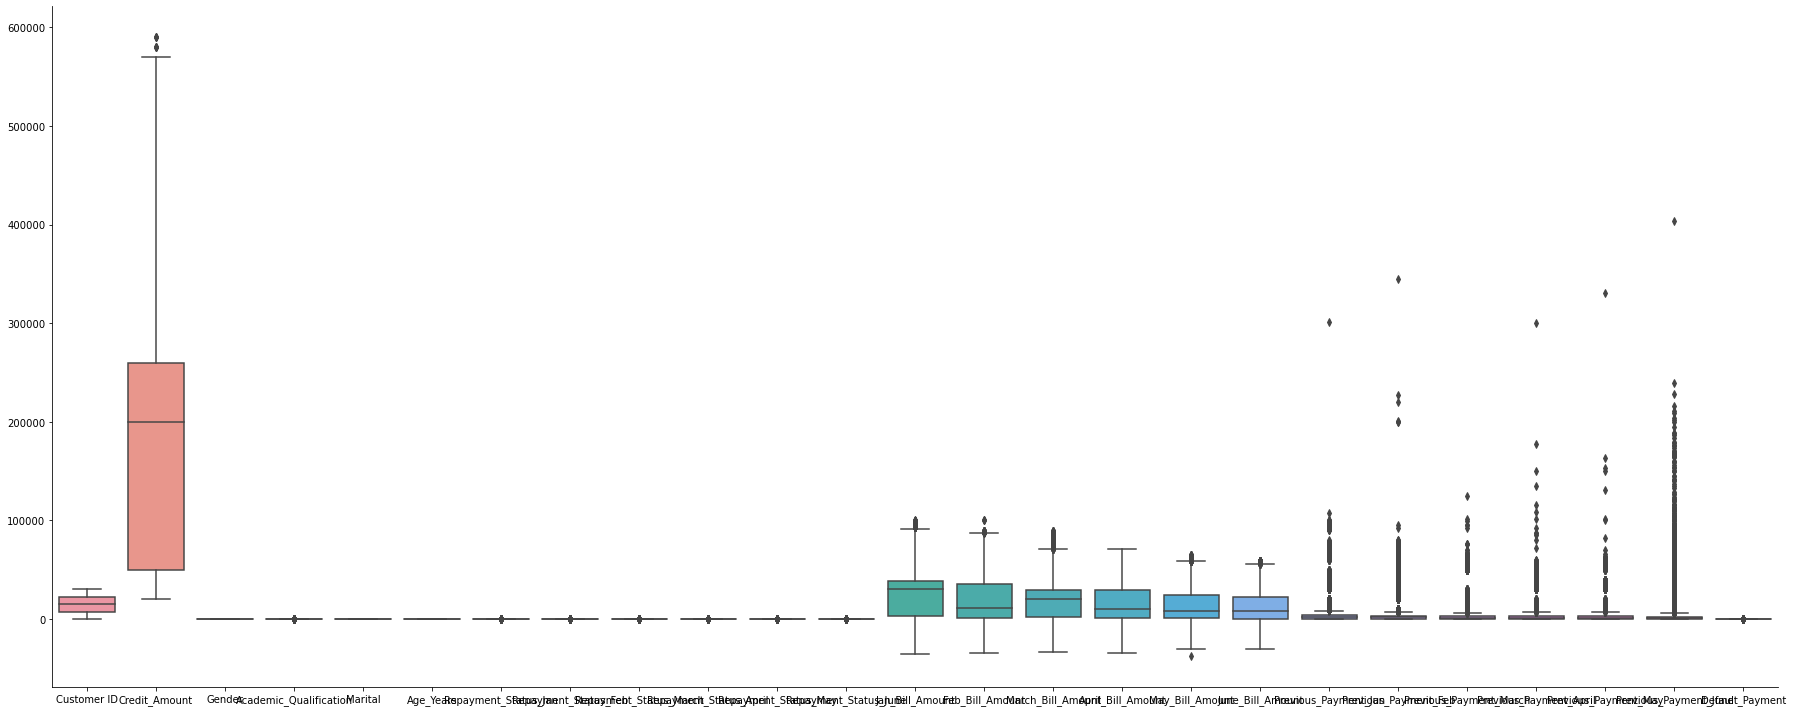

In [24]:
sns.catplot(data=bc, kind='box',height=10,aspect=2.5)

After treating the outliers we will see the distribution

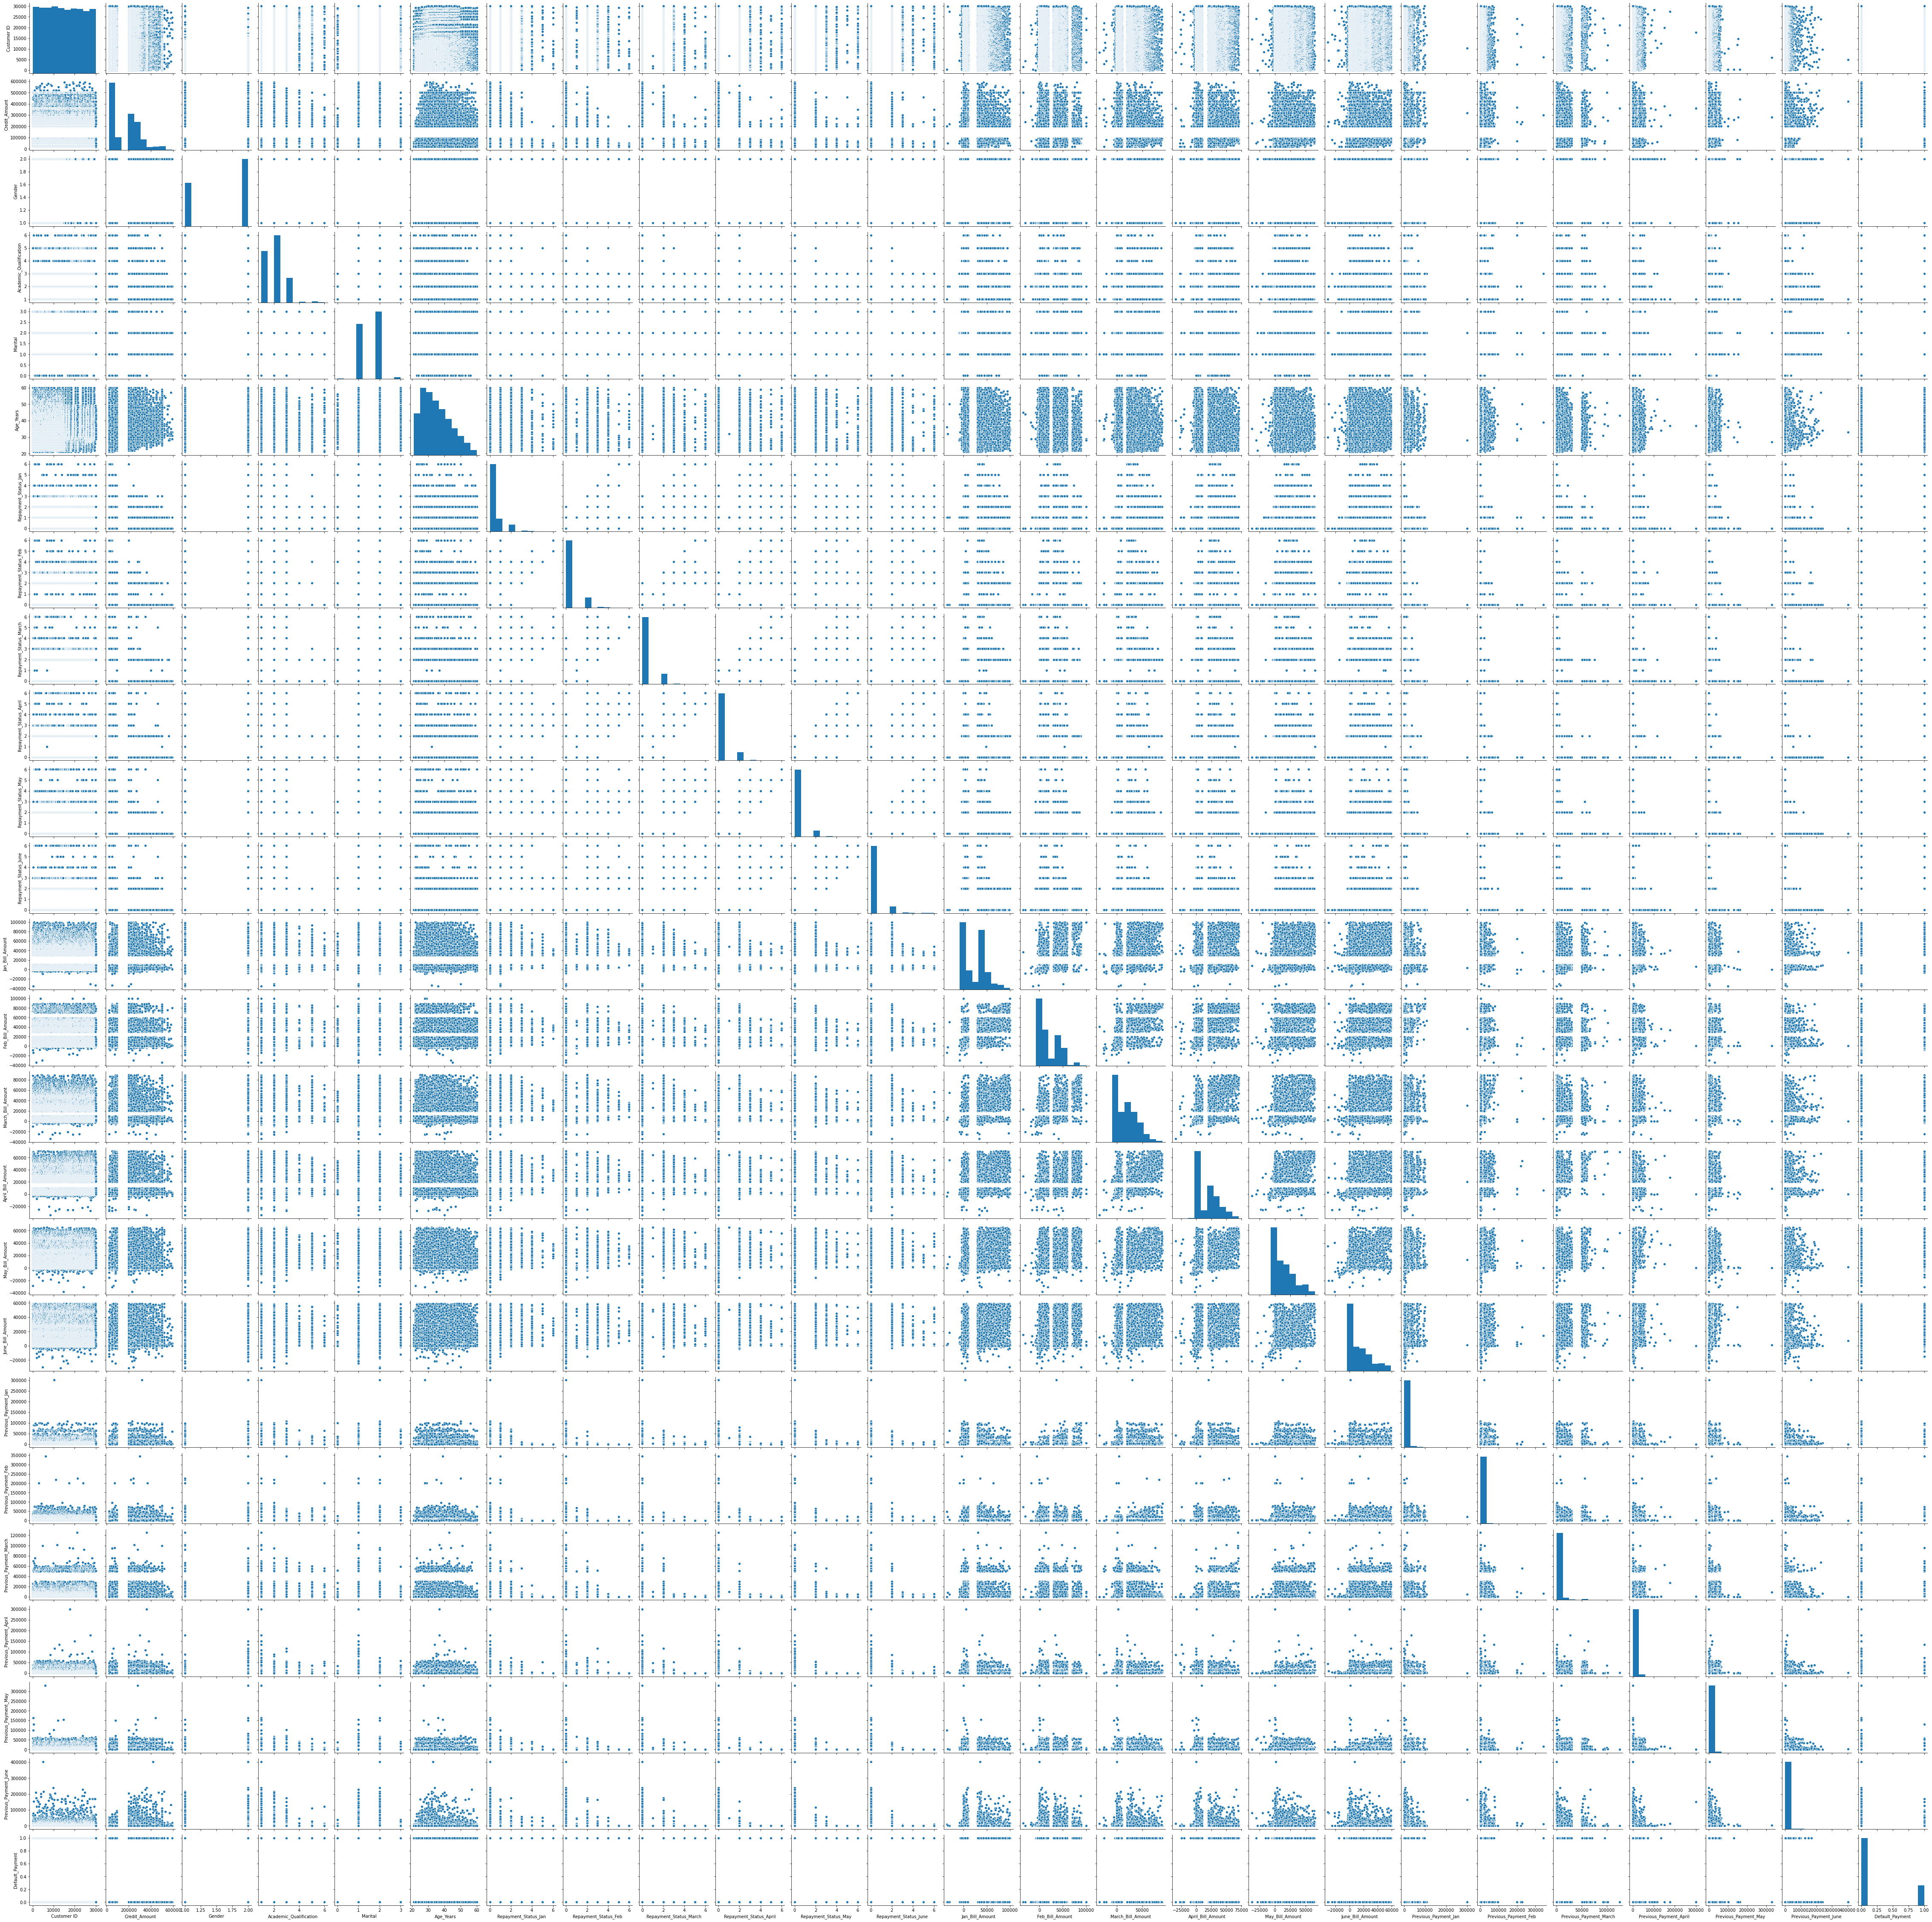

In [26]:
sns.pairplot(data= bc)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001438D0543A0>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

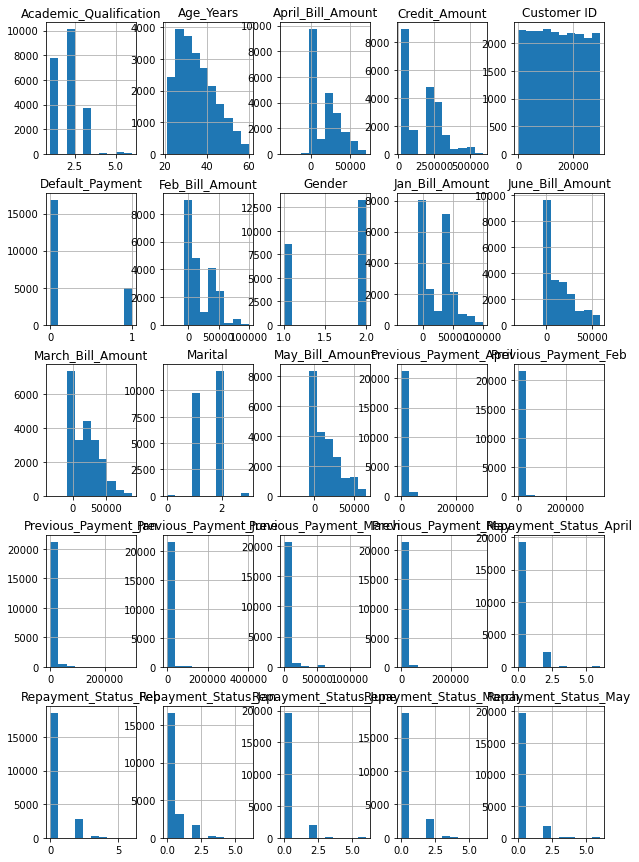

In [29]:
plt.figure(figsize=(20,20))
bc.hist(figsize=(10,15))

## Correlation Analysis

In [26]:
bc.corr()

Customer ID  Credit_Amount    Gender  \
Customer ID                1.000000       0.030339  0.023142   
Credit_Amount              0.030339       1.000000  0.078225   
Gender                     0.023142       0.078225  1.000000   
Academic_Qualification     0.037088      -0.257041 -0.001758   
Marital                   -0.036282      -0.110847 -0.045197   
Age_Years                  0.022084       0.127246 -0.075229   
Repayment_Status_Jan      -0.013635      -0.194371 -0.030121   
Repayment_Status_Feb      -0.003042      -0.231398 -0.042179   
Repayment_Status_March    -0.013666      -0.217345 -0.042115   
Repayment_Status_April     0.027542      -0.204279 -0.039280   
Repayment_Status_May      -0.008036      -0.196092 -0.035395   
Repayment_Status_June     -0.023297      -0.187667 -0.030024   
Jan_Bill_Amount           -0.017211      -0.270198 -0.051315   
Feb_Bill_Amount           -0.019552      -0.248699 -0.044109   
March_Bill_Amount         -0.004906      -0.254854 -0.042763   
April_Bill_Amount          0.027643      -0.239791 -0.034678   
May_Bill_Amount           -0.002215      -0.195280 -0.013555   
June_Bill_Amount           0.003968      -0.193299 -0.009328   
Previous_Payment_Jan      -0.003581       0.157081  0.003847   
Previous_Payment_Feb       0.001603       0.172642  0.012040   
Previous_Payment_March     0.051734       0.179676  0.020605   
Previous_Payment_April     0.012051       0.159421  0.022430   
Previous_Payment_May       0.003234       0.162304  0.013670   
Previous_Payment_June      0.005714       0.175498  0.007972   
Default_Payment           -0.011264      -0.161511 -0.034685   

                        Academic_Qualification   Marital  Age_Years  \
Customer ID                           0.037088 -0.036282   0.022084   
Credit_Amount                        -0.257041 -0.110847   0.127246   
Gender                               -0.001758 -0.045197  -0.075229   
Academic_Qualification                1.000000 -0.138639   0.183534   
Marital                              -0.138639  1.000000  -0.420070   
Age_Years                             0.183534 -0.420070   1.000000   
Repayment_Status_Jan                  0.060343 -0.002990  -0.008928   
Repayment_Status_Feb                  0.071918 -0.001677  -0.011633   
Repayment_Status_March                0.062085  0.009671  -0.014385   
Repayment_Status_April                0.056476  0.001128  -0.006689   
Repayment_Status_May                  0.048476  0.004943  -0.017074   
Repayment_Status_June                 0.037308  0.011482  -0.022062   
Jan_Bill_Amount                       0.130194  0.046875  -0.052344   
Feb_Bill_Amount                       0.119504  0.039455  -0.039309   
March_Bill_Amount                     0.116519  0.041445  -0.040308   
April_Bill_Amount                     0.106378  0.044020  -0.054133   
May_Bill_Amount                       0.079115  0.036350  -0.052579   
June_Bill_Amount                      0.077397  0.034373  -0.047370   
Previous_Payment_Jan                 -0.049521 -0.006314   0.022034   
Previous_Payment_Feb                 -0.049265 -0.014100   0.027424   
Previous_Payment_March               -0.051791 -0.017986   0.019989   
Previous_Payment_April               -0.059161 -0.014555   0.018440   
Previous_Payment_May                 -0.064799 -0.011287   0.013341   
Previous_Payment_June                -0.057390 -0.003110   0.005895   
Default_Payment                       0.034662 -0.018455   0.008733   

                        Repayment_Status_Jan  Repayment_Status_Feb  \
Customer ID                        -0.013635             -0.003042   
Credit_Amount                      -0.194371             -0.231398   
Gender                             -0.030121             -0.042179   
Academic_Qualification              0.060343              0.071918   
Marital                            -0.002990             -0.001677   
Age_Years                          -0.008928             -0.011633   
Repayment_Status_Jan  

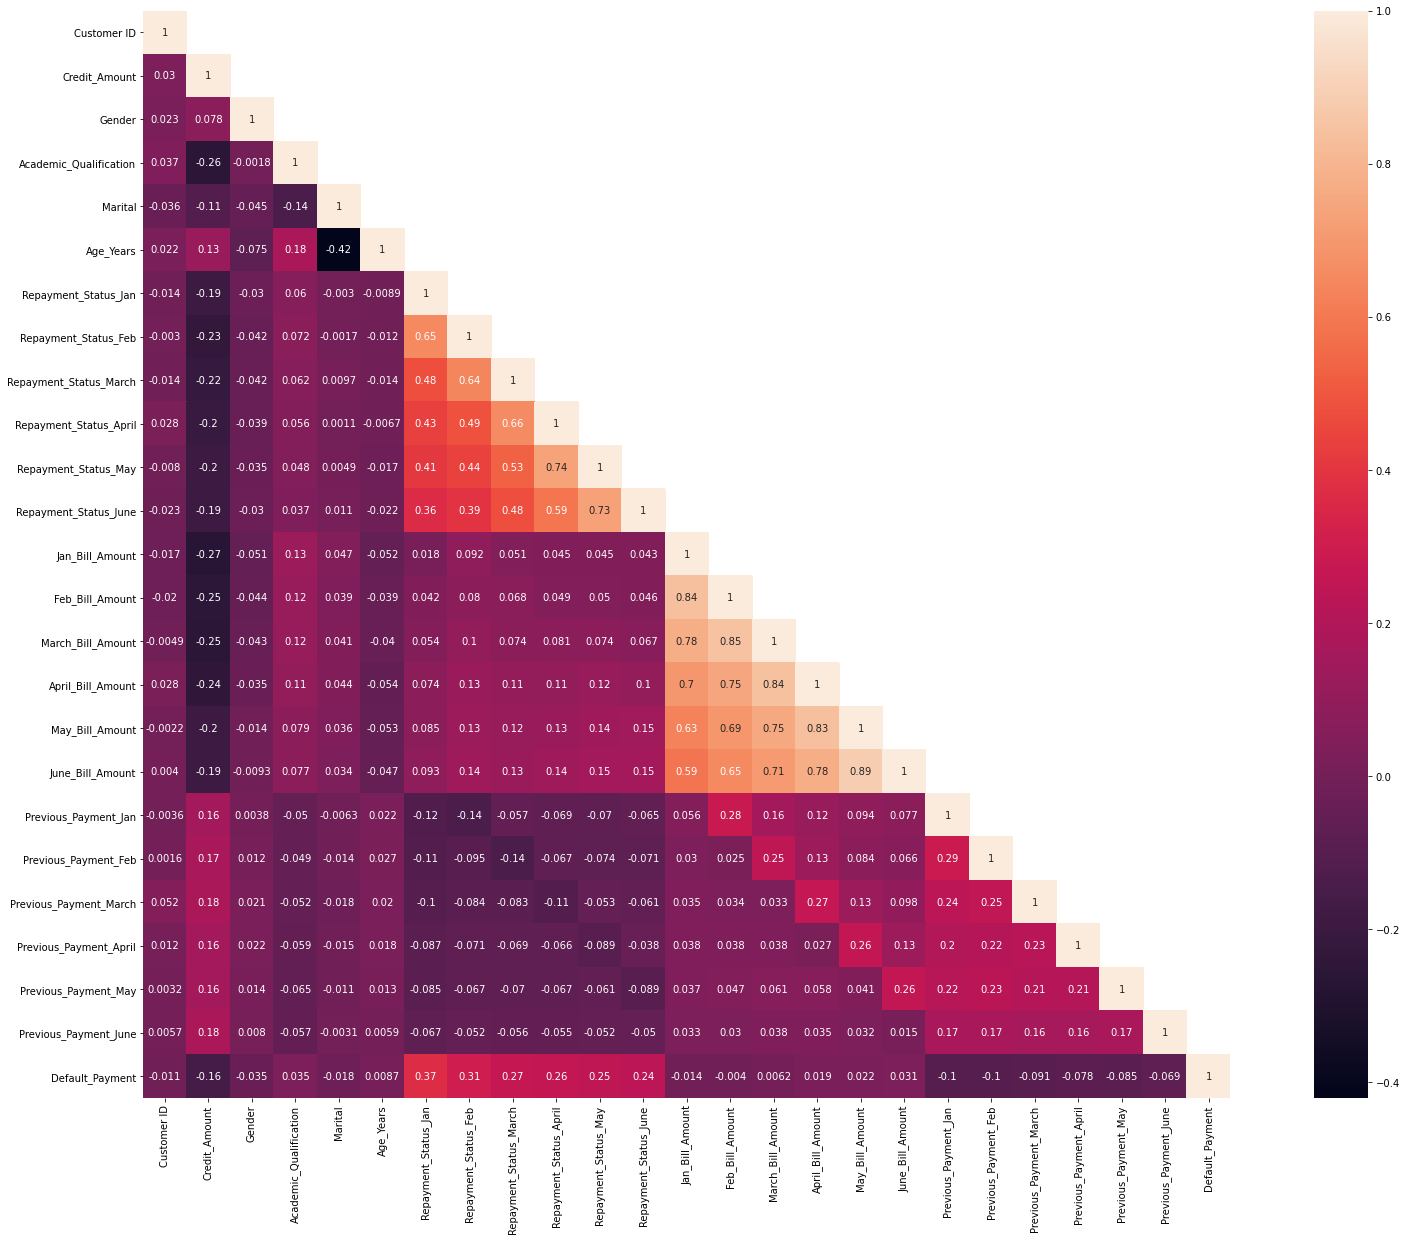

In [32]:
plt.figure(figsize=(30,20))
mask = np.array(bc.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bc.corr(),annot=True,mask= mask,square= True,cbar=True)

### Observation

Negative Correlation : Credit_Amount and Jan_Bill_Amount, Marital and Age_Years.


Positive Correlation : May_Bill_Amount and June_Bill_Amount, April_Bill_Amount and May_Bill_Amount,Feb_Bill_Amount and March_Bill_Amount.

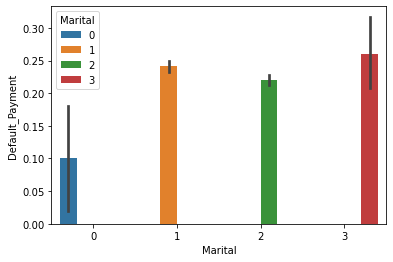

In [28]:
sns.barplot(bc['Marital'],bc['Default_Payment'], hue=bc['Marital'] )

As we saw in the description there is a 0 category, similarly the barplot depicts the same. We need to drop the category.

In [29]:
bc.drop(bc[bc['Marital'] ==0].index, inplace = True)

## Segregating the variables into Independent and Dependent Category

In [30]:
bcc= bc.drop('Customer ID',axis=1)

In [31]:
X = bcc.drop("Default_Payment",axis = 1)
y = bc["Default_Payment"]

### Spliting the dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

### Normalizing the Numerical Variables
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_train_standardized = pd.DataFrame(X_train_standardized)
X_test_standardized = pd.DataFrame(X_test_standardized)
print("Normalization Done")

X_train_standardized.head()

Normalization Done


0    1    2    3         4         5    6    7    8    9   ...  \
0  0.385965  1.0  0.0  0.0  0.512821  0.000000  0.0  0.0  0.0  0.0  ...   
1  0.456140  1.0  0.0  0.0  0.410256  0.000000  0.0  0.0  0.0  0.0  ...   
2  0.000000  1.0  0.2  0.5  0.051282  0.000000  0.0  0.0  0.0  0.0  ...   
3  0.491228  1.0  0.0  0.0  0.384615  0.166667  0.0  0.0  0.0  0.0  ...   
4  0.701754  1.0  0.2  0.5  0.384615  0.000000  0.0  0.0  0.0  0.0  ...   

         13        14        15        16        17        18        19  \
0  0.420543  0.376013  0.477837  0.489356  0.033205  0.010161  0.000000   
1  0.292315  0.535087  0.494525  0.602174  0.054226  0.021497  0.200405   
2  0.459177  0.577648  0.544786  0.547904  0.005313  0.007548  0.012794   
3  0.218847  0.279905  0.385181  0.370590  0.000000  0.000000  0.000000   
4  0.511539  0.579960  0.714891  0.603767  0.055276  0.097527  0.127942   

         20        21        22  
0  0.028200  0.030675  0.012392  
1  0.073817  0.203528  0.021204  
2  0.005640  0.004067  0.001621  
3  0.010682  0.003067  0.011554  
4  0.200420  0.204399  0.059437  

[5 rows x 23 columns]

In [33]:
X_train_standardized.columns = X_train.columns
X_test_standardized.columns = X_test.columns

### Building the SVM Model

In [34]:
from sklearn.svm import SVC

In [35]:
svc_clf = SVC(kernel="linear",verbose=True)
svc_clf.fit(X_train_standardized,y_train)

[LibSVM]

SVC(kernel='linear', verbose=True)

### Predicting on the test Data

In [36]:
y_test_pred = svc_clf.predict(X_test_standardized)

### Evaluating the model on Validation dataset

In [37]:
from sklearn.model_selection import cross_val_score

score_SVM = cross_val_score(svc_clf, X_train_standardized, y_train, cv=4)
print("Cross Validation score : " + str(score_SVM))
print("Cross Validation Mean score : " + str(score_SVM.mean()))

[LibSVM][LibSVM][LibSVM][LibSVM]Cross Validation score : [0.80185456 0.78618501 0.77959483 0.81034904]
Cross Validation Mean score : 0.7944958594969977


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy

0.7957540263543191

In [39]:

# Let's try different kernel like Gaussian kernel 'rbf'# Let's try different kernel like Gaussian kernel 'rbf'

svc_clf2 = SVC(kernel="rbf")
svc_clf2.fit(X_train_standardized,y_train)

score_SVM = cross_val_score(svc_clf2, X_train_standardized, y_train, cv=5)
print("Cross Validation score : " + str(score_SVM))
print("Cross Validation Mean score : " + str(score_SVM.mean()))

Cross Validation score : [0.80750458 0.79865772 0.80353874 0.79957291 0.80805615]
Cross Validation Mean score : 0.8034660192891346


In [40]:
y_test_pred = svc_clf2.predict(X_test_standardized)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy

0.8118594436310396

In this case,SVM model performs better when we use thw Gaussian Kernel as compared to the linear SVM